In [5]:
import tensorflow as tf

from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist

import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.0


In [6]:
(x_train, t_train), (x_test, t_test) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

print('x_train.shape : {0}, x_test.shape : {1}'.format(x_train.shape, x_test.shape))
print('t_train.shape : {0}, t_test.shape : {1}'.format(t_train.shape, t_test.shape))


x_train.shape : (60000, 28, 28), x_test.shape : (10000, 28, 28)
t_train.shape : (60000,), t_test.shape : (10000,)


In [10]:
model = Sequential()

model.add(Conv2D(input_shape=(28,28,1),
                kernel_size=5, filters=32,
                 strides=(1,1), activation='relu', use_bias=True, padding='SAME'))

model.add(MaxPool2D(pool_size=(2,2),padding='SAME'))

model.add(Flatten())

model.add(Dense(10, activation='softmax'))

In [11]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                62730     
                                                                 
Total params: 63,562
Trainable params: 63,562
Non-trainable params: 0
_________________________________________________________________


In [12]:
hist = model.fit(x_train.reshape(-1,28,28,1), t_train,
                 batch_size=50, epochs=30, validation_split=0.2)

Epoch 1/30
960/960 [==============================] - 32s 33ms/step - loss: 0.2423 - accuracy: 0.9298 - val_loss: 0.0991 - val_accuracy: 0.9730
Epoch 2/30
960/960 [==============================] - 32s 34ms/step - loss: 0.0827 - accuracy: 0.9759 - val_loss: 0.0720 - val_accuracy: 0.9789
Epoch 3/30
960/960 [==============================] - 32s 33ms/step - loss: 0.0597 - accuracy: 0.9822 - val_loss: 0.0583 - val_accuracy: 0.9827
Epoch 4/30
960/960 [==============================] - 32s 33ms/step - loss: 0.0480 - accuracy: 0.9855 - val_loss: 0.0612 - val_accuracy: 0.9824
Epoch 5/30
960/960 [==============================] - 32s 33ms/step - loss: 0.0382 - accuracy: 0.9887 - val_loss: 0.0538 - val_accuracy: 0.9833
Epoch 6/30
960/960 [==============================] - 32s 33ms/step - loss: 0.0332 - accuracy: 0.9898 - val_loss: 0.0557 - val_accuracy: 0.9833
Epoch 7/30
960/960 [==============================] - 32s 33ms/step - loss: 0.0284 - accuracy: 0.9912 - val_loss: 0.0555 - val_accuracy:

In [ ]:
model.evaluate(x_test.reshape(-1,28,28,1), t_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0973 - accuracy: 0.9793


[0.09731550514698029, 0.9793000221252441]

In [65]:
ret_val = model.predict(x_test)

print('type(ret_val) : ', type(ret_val), ', ret_val.shape : ', ret_val.shape)

predicted_val = np.argmax(ret_val,axis=1)

predicted_label_comp_val = np.equal(predicted_val,t_test)

index_label_prediction_list = [ [index, t_test[index], predicted_val[index]] for index, result in enumerate(predicted_label_comp_val) if result == False ]

len(index_label_prediction_list)

print('Accuracy : ', 1-(len(index_label_prediction_list)/len(x_test)))

type(ret_val) :  <class 'numpy.ndarray'> , ret_val.shape :  (10000, 10)
Accuracy :  0.9875


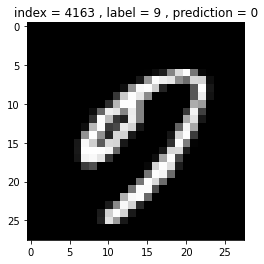

In [70]:
# 임의의 false prediction 이미지 출력

false_data_index = np.random.randint(len(index_label_prediction_list))

#print('len of index_label_prediction_list => ', len(index_label_prediction_list), ', false_data_index => ', false_data_index)

mnist_index = index_label_prediction_list[false_data_index][0]
label = index_label_prediction_list[false_data_index][1]
prediction = index_label_prediction_list[false_data_index][2]

title_str = 'index = ' + str(mnist_index) + ' , label = ' + str(label) + ' , prediction = ' + str(prediction)

img = x_test[mnist_index].reshape(28,28)

plt.title(title_str)
plt.imshow(img, cmap='gray')
plt.show()